# Project: Investigate a Dataset No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This is a Brasilian medical appointment dataset of people which consists of various variables (PatientId, AppointmentID, ScheduleDay, Gender, Age, Neighbourhood, No-Show and others) needed for the analysis of this project.

>The key variables in this dataset are **No-Show** which is our dependent variable and Independent variables like Age, Scholarship, Gender and many others.

>The probability of people showing up or not for their medical appointment depends on the independant variables of this dataset. That is why we have **No-Show** as our dependant variable because some factors must be considered to predict whether a patient will show up for the appointment or not.

### Questions for Analysis
> In this project, i'll be analysing to know which gender shows up the most for the appointment.

> Will patients who receive SMS show up for the appointment than those who did not? 

> Do the scheduled date and time of patients affect No-Show?.

> Do patients with scholarship show up the most for the appointment?.

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

##### In this section of report, i'll load in the dataset, check for cleanliness, trim and clean the dataset for analysis.

In [2]:
# Load the dataset and check the first five rows

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# check for the dimension of the dataset
df.shape

(110527, 14)

**The above code is used to check for the dimension of the dataset. Thata is, the total number of Columns and Rows**.

In [4]:
# get familiar with the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**The above code is used to get the satistical values of the dataset**.

In [5]:
# check for duplicate rows
sum(df.duplicated())

0

**No duplicate rows detected**

In [6]:
# to check for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**The above code shlowed that there is no null values in the dataset**.

In [7]:
# check for general information of the dataset

df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**The code above gave an apt information about the dataset. It showed all the columns names, that there are no null values and also the datatypes of each columns**.

### Data Cleaning

**Based on the Wrangling done above, below are things to be done in the cleaning phase:**

> Drop the PatientId, AppointmentID, AppointmentDay(since ScheduledDay comprises of both date and time) and others as we won't be needing them for the analysis.

> Change "No-Show" column datatype from String to Integer for proper statistical analysis.

> Split ScheduledDay into Date and Time.

> Renaming of No-Show Column to comply with the naming standard in python.


**Below code is used to drop unused columns from the dataset.**

In [8]:
# drop unused columns; 'axis' is used to tell the function that we are using the columns;
#'inplace' function is used to keep the changes made.

df.drop(['PatientId', 'AppointmentID', 'AppointmentDay', 'Hipertension', 'Handcap', 'Diabetes', 'Alcoholism', 'Age'], axis=1, inplace=True)

In [9]:
# check if the changes have been made
df.head()

,Gender,ScheduledDay,Neighbourhood,Scholarship,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,JARDIM DA PENHA,0,0,No
1,M,2016-04-29T16:08:27Z,JARDIM DA PENHA,0,0,No
2,F,2016-04-29T16:19:04Z,MATA DA PRAIA,0,0,No
3,F,2016-04-29T17:29:31Z,PONTAL DE CAMBURI,0,0,No
4,F,2016-04-29T16:07:23Z,JARDIM DA PENHA,0,0,No


**Below code changes "No-show" column datatype from String to Integer for a better satistical analysis**

In [10]:
# convert strings in 'No-Show' column to integer
df['No-show'].replace(('Yes', 'No'), (1,0), inplace=True)
df.head()

,Gender,ScheduledDay,Neighbourhood,Scholarship,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,JARDIM DA PENHA,0,0,0
1,M,2016-04-29T16:08:27Z,JARDIM DA PENHA,0,0,0
2,F,2016-04-29T16:19:04Z,MATA DA PRAIA,0,0,0
3,F,2016-04-29T17:29:31Z,PONTAL DE CAMBURI,0,0,0
4,F,2016-04-29T16:07:23Z,JARDIM DA PENHA,0,0,0


**The code below is used to change the ScheduledDay datatype from string to datetime.**

In [11]:
# Change ScheduledDay datatype to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], infer_datetime_format=True)

In [12]:
# confirm if the change has been made
df.dtypes

Gender                        object
ScheduledDay     datetime64[ns, UTC]
Neighbourhood                 object
Scholarship                    int64
SMS_received                   int64
No-show                        int64
dtype: object

**Having changed the datatype, we need to split the ScheduledDay variable into date and time and assign names to the newly split variables.**

In [13]:
# Split ScheduledDay into date and time and assign new variables names to them
df['ScheduledTime'] = df['ScheduledDay'].dt.time
df['ScheduledDay'] = df['ScheduledDay'].dt.date
df.head()

,Gender,ScheduledDay,Neighbourhood,Scholarship,SMS_received,No-show,ScheduledTime
0,F,2016-04-29,JARDIM DA PENHA,0,0,0,18:38:08
1,M,2016-04-29,JARDIM DA PENHA,0,0,0,16:08:27
2,F,2016-04-29,MATA DA PRAIA,0,0,0,16:19:04
3,F,2016-04-29,PONTAL DE CAMBURI,0,0,0,17:29:31
4,F,2016-04-29,JARDIM DA PENHA,0,0,0,16:07:23


**Replace '-' in No-show with an underscore for proper naming format.**

In [14]:
# replace hyphen with an underscore for No-show column
df.rename(columns=lambda x: x.strip().replace("-", "_"), inplace=True)
df.head()

,Gender,ScheduledDay,Neighbourhood,Scholarship,SMS_received,No_show,ScheduledTime
0,F,2016-04-29,JARDIM DA PENHA,0,0,0,18:38:08
1,M,2016-04-29,JARDIM DA PENHA,0,0,0,16:08:27
2,F,2016-04-29,MATA DA PRAIA,0,0,0,16:19:04
3,F,2016-04-29,PONTAL DE CAMBURI,0,0,0,17:29:31
4,F,2016-04-29,JARDIM DA PENHA,0,0,0,16:07:23


<a id='eda'></a>
## Exploratory Data Analysis


###  Question 1: Which gender shows up the most for the appointment?

**Below shows the total number of both males and females scheduled for the medical appointment.**

In [15]:
# This is just to get an overview of the number of each gender scheduled for the appointment
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

**We need to get the mean of No_show column to know the gender that shows up the most.**

In [16]:
# Groupby gender and get the mean of No_show
df.groupby('Gender')['No_show'].mean()

Gender
F    0.203146
M    0.199679
Name: No_show, dtype: float64

**Below shows the variables assigned for patients who did not show up for their scheduled appointment and patients who showed up.**

In [17]:
# No_show column will be True if the patient did not show up while it will be false if the patient showed up for the appointment
No_show = df.No_show ==True
Showed_up = df.No_show == False


**The below code is used to plot the relationship between Gender and No_show.**

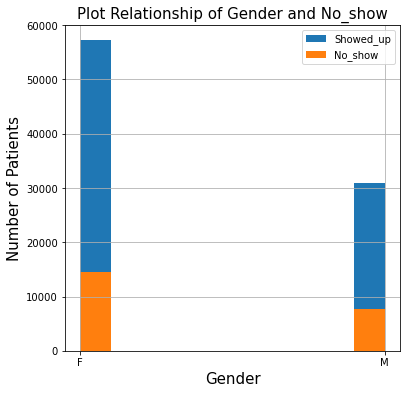

In [18]:
df.Gender[Showed_up].hist(alpha=1, bins=10, label='Showed_up', figsize=(6,6)),
df.Gender[No_show].hist(alpha=1, bins=10,label='No_show')
plt.title("Plot Relationship of Gender and No_show", fontsize=15)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Number of Patients", fontsize=15)
plt.legend();

**Based on the graph plotted above, it is seen that Females show up the most for their appointment than Males conterpart**

###  Question 2: Will patients who received SMS show up for the appointment than those who didnt?

**Below code is to get the mean of those who received SMS and will show up or not for their appointment.**

In [19]:
df.Gender.value_counts('SMS_received')

F    0.649977
M    0.350023
Name: Gender, dtype: float64

In [20]:
df.groupby('SMS_received').No_show.mean()

SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64

**From the above code, it shows that patients who did not receive SMS showed up more than those who received.**
**Note that we already change No_show datatype to integer hence, the 0 and 1 seen above.**
**0 indicates that patients showed up while 1 indicates that patients didn't show up.**

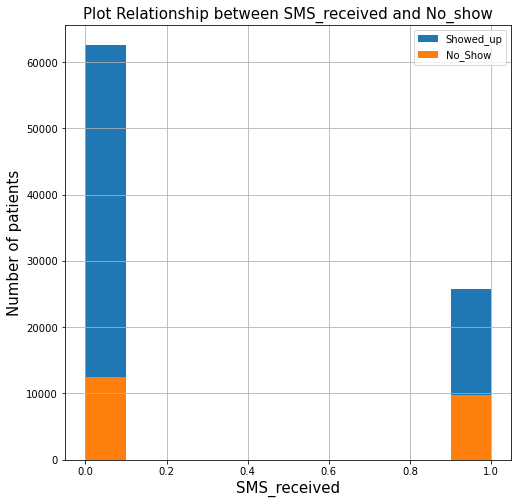

In [21]:
df.SMS_received[Showed_up].hist(alpha=1, bins=10, label='Showed_up', figsize = (8,8)),
df.SMS_received[No_show].hist(alpha=1, bins=10,label='No_Show');
plt.title("Plot Relationship between SMS_received and No_show", fontsize=15)
plt.xlabel("SMS_received", fontsize=15)
plt.ylabel("Number of patients", fontsize=15)
plt.legend();

**The graph above further justifies the explanation in code cell 41**

###  Question 3: Do the scheduled date and time of patients affect No-Show?

In [22]:
# groupby ScheduledDay and get the mean of the relationship between ScheduledDay and No_show
ScheduledDay = df.groupby('ScheduledDay').No_show.mean()

**Below, i'll define functions to plot graphs in order to avoid repitition of codes.**

In [23]:
# Define a function to plot horizontal barcharts
def horizontalbarChart(Dataframe, x_label, y_label, title, size, fontsize):
    Dataframe.plot.barh(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=15)
    plt.show()

# Define a function to plot Vertical barcharts
def verticalbarChart(Dataframe, x_label, y_label, title, size, fontsize):
    Dataframe.plot.bar(figsize=size)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, fontsize=15)
    plt.show()

**The graph below shows the relationship between ScheduledDay and No_show. It can be seen that patients respect their scheduled appointment.**

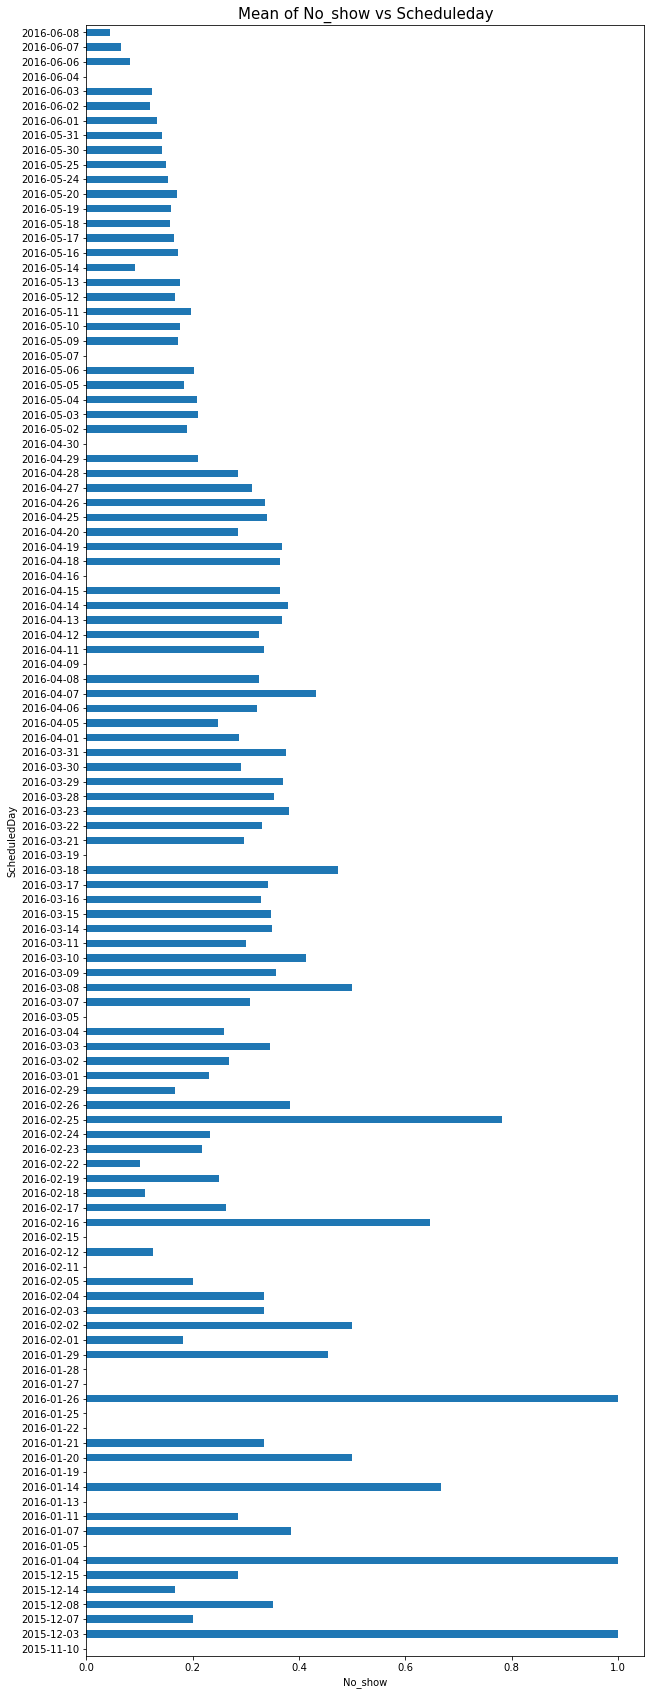

In [24]:
horizontalbarChart(ScheduledDay,'No_show','ScheduledDay','Mean of No_show vs Scheduleday', (10,30), 15)

**It is seen that the scheduled date and time affect No_show.**

### Question 4: Do patients with scholarship show up the most for the appointment?

**Below code shows the relationship between scholarship and No_show.**

In [25]:
#First we groupby Scholarship and get the mean of the relationship between Scholarship and No_show
Scholarship = df.groupby('Scholarship').No_show.mean()

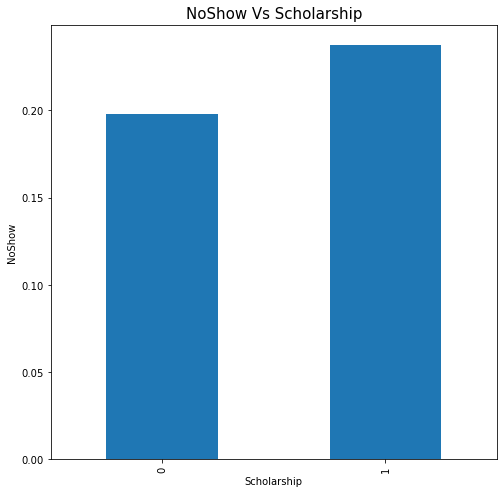

In [26]:
# Bar chart representation of the relationship between scholarship and No_show
verticalbarChart(Scholarship,'Scholarship','NoShow','NoShow Vs Scholarship', (8,8), 15)

**From the bar chart above and histogram plotted below, both graphs show that patients with scholarship would definitely show up for their appointments.**

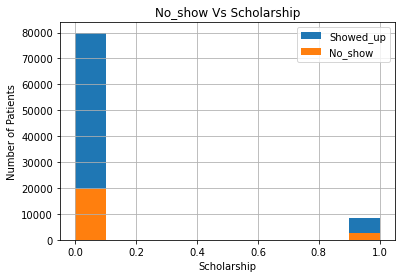

In [27]:
df.Scholarship[Showed_up].hist(alpha=1, bins=10, label='Showed_up'),
df.Scholarship[No_show].hist(alpha=1, bins=10,label='No_show') 
plt.title("No_show Vs Scholarship")
plt.xlabel("Scholarship")
plt.ylabel("Number of Patients")
plt.legend();

<a id='conclusions'></a>
## Conclusions

Result: The analysis showed that
> Females(in Gender Column) showed up the most for their scheduled appointment, patients who did not receive SMS showed up more than those who received, patients honoured their scheduled appointment irrespective of the day and time and patients with scholarship tend to show up more.

> Conclusively, It can be categorically stated that scholarship is a great motivating factor for patients to show up for their respective appointments. Also, Female tend to respect their appointment more than the male counterpart hence, the need for a means to encourage them to respect their appointment more as they say health is wealth. Unfortunately, those who did not receive SMS tend to show up more. Maybe pushing calls through to them as a reminder when their appointment is near can produce a better result.

> Worth mentioning is that this project is done in collaboration with of one the cohorts **(Sango Pascal)** and also with some google search on stackoverflow.


Limitation:
> The statistics used here are descriptive statistics, which means i did not create any controlled experiments with the data.
